# Hierarchical Clustering

## Imports

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generating Fake Data

In [196]:
from sklearn.datasets import make_blobs

np.random.seed(0)
x, y = make_blobs(n_samples=100, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std=0.9)

print(x[0:5])
print(y[0:5])

[[ 4.13945268  4.34034627]
 [ 9.42074344  1.99893716]
 [-1.9401345  -0.72777529]
 [ 9.00605499  4.04694857]
 [ 9.59002075  4.01573124]]
[0 3 1 3 3]


## Plotting Generated Data

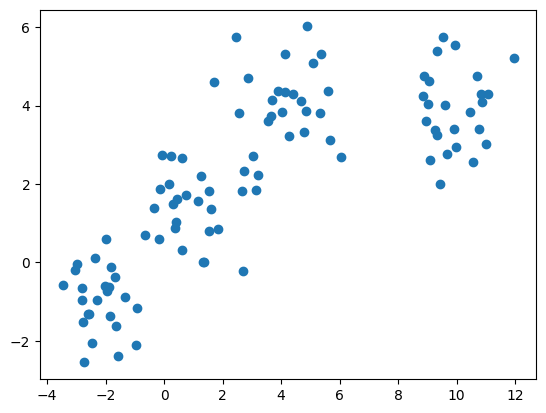

In [197]:
plt.scatter(x[:, 0], x[:, 1], marker="o")

## Agglomerative Clustering

In [198]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=4, linkage="average")
agglomerative_clustering.fit(x, y)

,n_clusters,4
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'average'
,distance_threshold,None
,compute_distances,False


## Plot

([], [])

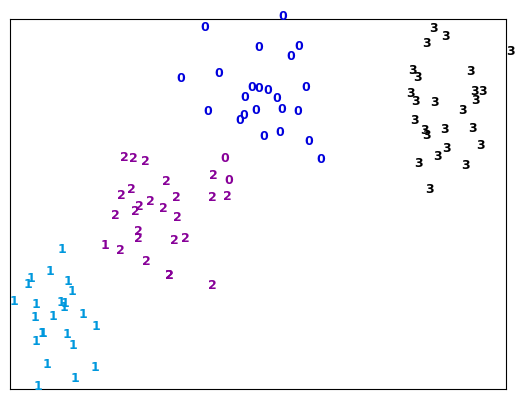

In [199]:
plt.figure()
x_min, x_max = np.min(x, axis=0), np.max(x, axis=0)

x1 =  (x - x_min) / (x_max - x_min)

for i in range(x1.shape[0]):
    plt.text(x1[i, 0], x1[i, 1], str(y[i]), color=plt.cm.nipy_spectral(agglomerative_clustering.labels_[i] / 10),
    fontdict={"weight": "bold", "size": 9})

plt.xticks([])
plt.yticks([])

## Dendrogram

/var/folders/hf/w_gfcq2d1fb0lz1_3xrvr1h80000gn/T/ipykernel_1636/3030251540.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(dist_matrix, "complete")


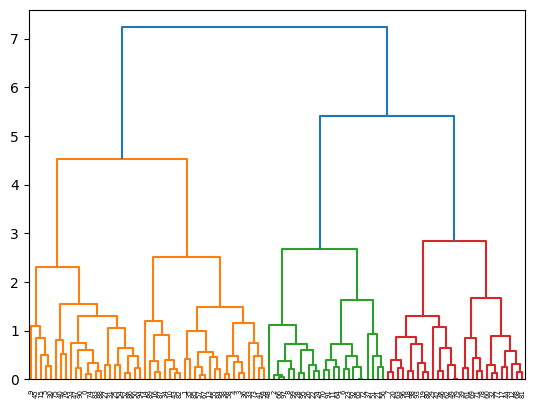

In [200]:
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy

dist_matrix = distance_matrix(x1, x1)
z = hierarchy.linkage(dist_matrix, "complete")

dendro = hierarchy.dendrogram(z)

<hr>

## Real Data

## Reading Real Data

In [201]:
df = pd.read_csv("cars_clus.csv")

print(df.shape)
df.head()

(159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


## Data Cleaning

In [202]:
print(df.columns)

df[[
    "sales", "resale", "type", "price", "engine_s",
    "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap",
    "mpg", "lnsales"
]] = df[[
    "sales", "resale", "type", "price", "engine_s",
    "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap",
    "mpg", "lnsales"
]].apply(pd.to_numeric, errors="coerce")

df = df.dropna()
df = df.reset_index(drop=True)

# mpg is miles per gallon, kml is kilometers per Liter
df["kml"] = (0.425144 * df["mpg"]).round(4)

print(df.shape)
df.head()

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')
(117, 17)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,kml
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,11.9040
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,10.6286
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,9.3532
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,11.4789
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,9.3532


## Selecting Features

In [203]:
feature_set = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

## Normalizing

In [204]:
from sklearn.preprocessing import MinMaxScaler

x = feature_set.values # Convert to a Numpy Array
min_max_scaler = MinMaxScaler().fit(x)
feature_set = min_max_scaler.transform(x) # All Values Between 0 and 1
feature_set[:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

## Dendrogram

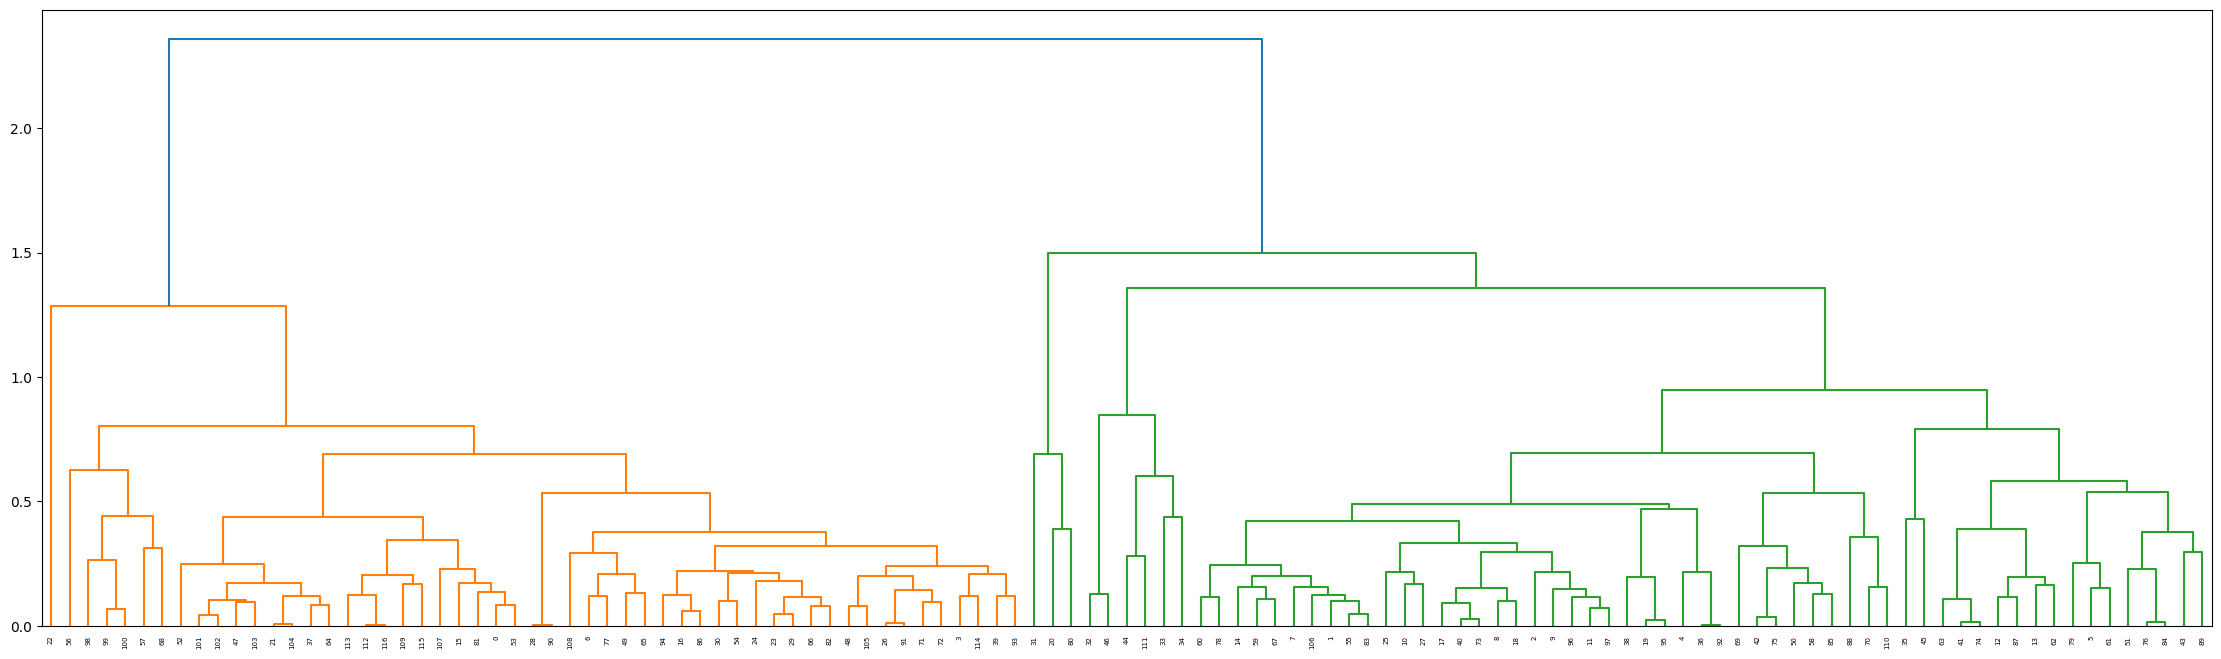

In [205]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

dist_matrix = distance_matrix(feature_set, feature_set)
condensed_dist = squareform(dist_matrix, checks=False)

Z = hierarchy.linkage(condensed_dist, "complete")

plt.figure(figsize=(28, 8))
dendrogram = hierarchy.dendrogram(Z)

## Flat Clustering: distance

In [206]:
from scipy.cluster.hierarchy import fcluster

max_d = 3
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

## Flat Clustering: maxclust

In [207]:
from scipy.cluster.hierarchy import fcluster

k = 5
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([1, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 3, 1,
       2, 1, 1, 5, 1, 5, 1, 1, 1, 3, 4, 4, 4, 5, 5, 1, 5, 1, 5, 5, 5, 5,
       4, 5, 4, 1, 1, 1, 5, 5, 1, 1, 1, 5, 1, 1, 5, 5, 5, 5, 5, 5, 1, 1,
       1, 5, 1, 5, 5, 1, 1, 5, 5, 5, 5, 1, 5, 5, 3, 1, 1, 5, 5, 5, 1, 5,
       5, 5, 1, 1, 5, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1,
       5, 4, 1, 1, 1, 1, 1], dtype=int32)

## Dendrogram

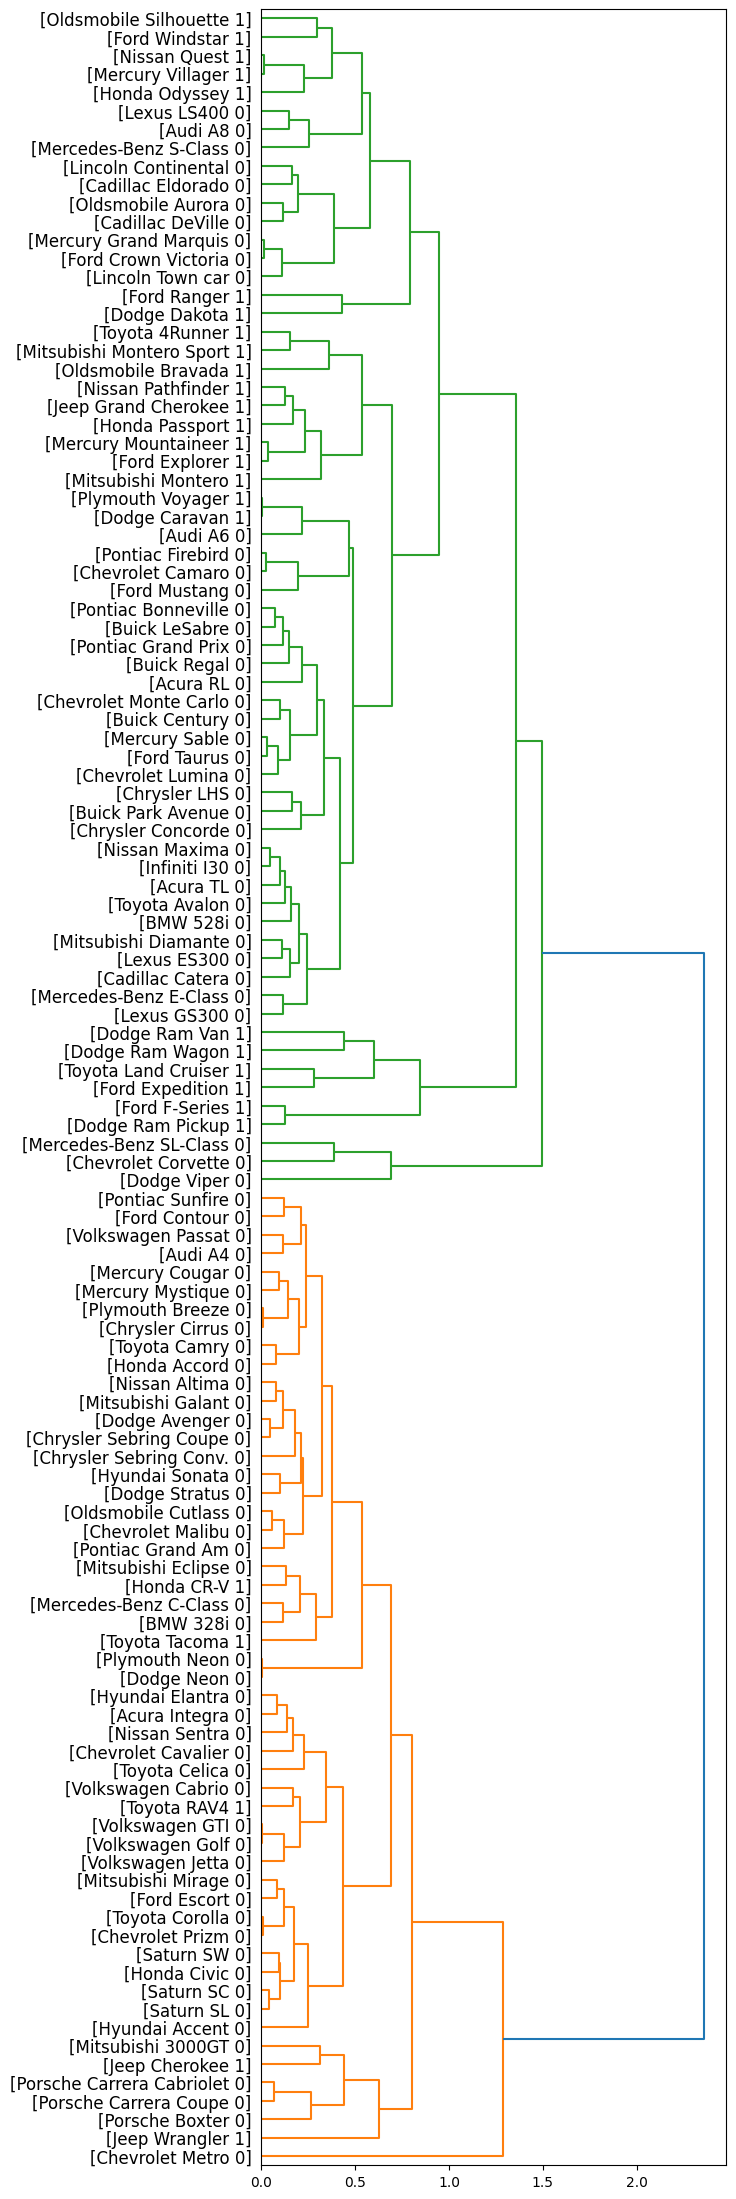

In [208]:
def llf(id):
    return "[%s %s %s]" % (df["manufact"][id], df["model"][id], int(float(df["type"][id])) )

plt.figure(figsize=(6, 28))
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = "right")

## Scikit-Learn Clustering

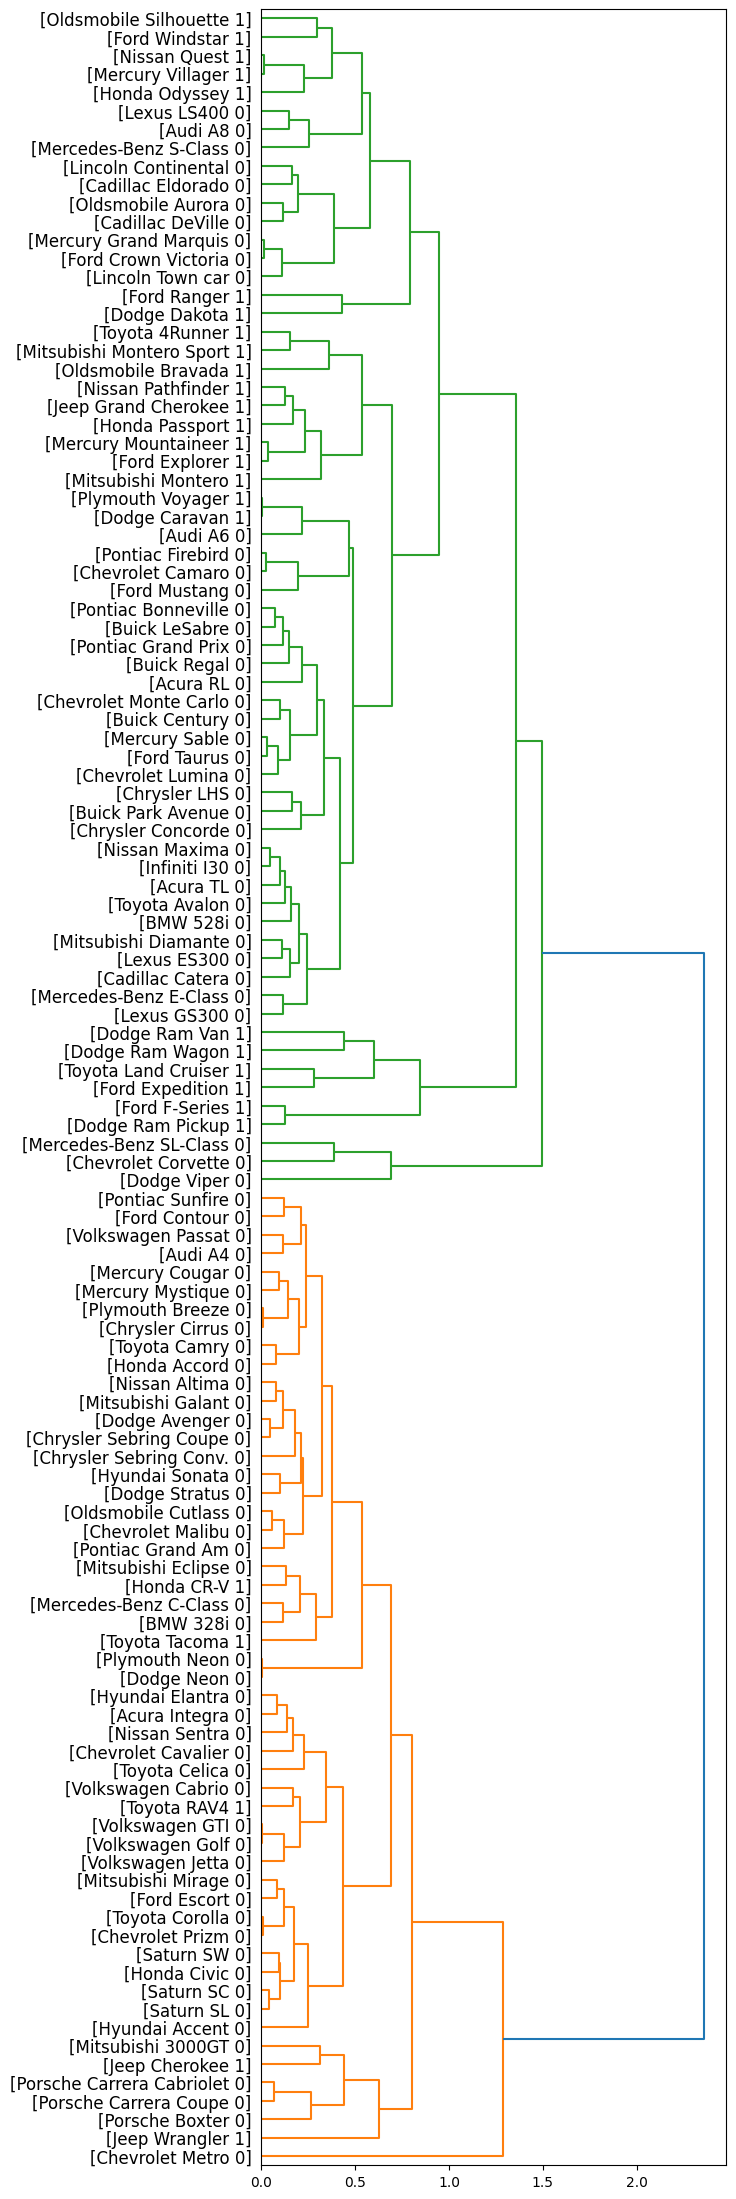

In [209]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import squareform

dist_matrix = euclidean_distances(feature_set, feature_set)
condensed_dist = squareform(dist_matrix, checks=False)

Z_using_dist_matrix = hierarchy.linkage(condensed_dist, "complete")

def llf(id):
    return "[%s %s %s]" % (df["manufact"][id], df["model"][id], int(float(df["type"][id])) )

plt.figure(figsize=(6, 28))
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = "right")

## Agglomerative Clustering

In [210]:
from sklearn.cluster import  AgglomerativeClustering

clusters_count = 6

# "precomputed" tells sklearn not to compute distances internally (we did it before)
agglomerative_clustering = AgglomerativeClustering(n_clusters=clusters_count, linkage="complete", metric="precomputed")
agglomerative_clustering.fit(dist_matrix)

agglomerative_clustering.labels_[:10]
df["cluster_label"] = agglomerative_clustering.labels_

## Visualization

/var/folders/hf/w_gfcq2d1fb0lz1_3xrvr1h80000gn/T/ipykernel_1636/652646675.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.kml, s=(subset.price * 10), c=color, label=("cluster" + str(label)))


Text(0, 0.5, 'Kilometers Per Liter')

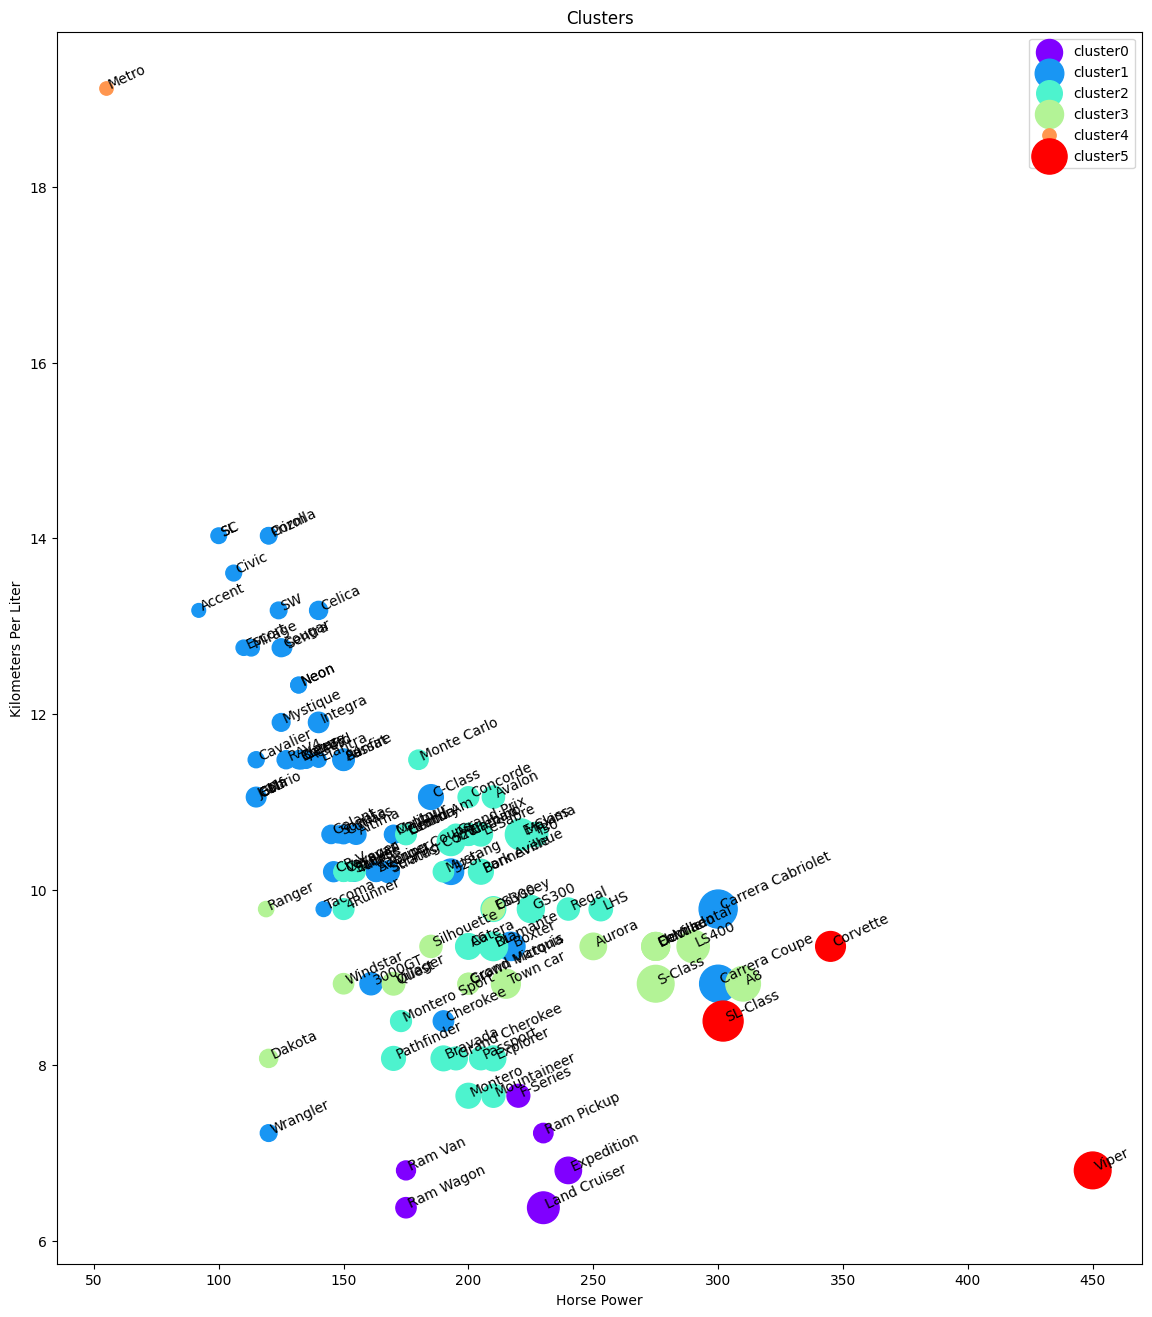

In [211]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, clusters_count))
cluster_labels = list(range(0, clusters_count))

plt.figure(figsize=(14, 16))

for label, color in zip(cluster_labels, colors):
    subset = df[df.cluster_label == label]

    for i in subset.index:
        plt.text(subset.horsepow[i], subset.kml[i], str(subset.model[i]), rotation=25)
    
    plt.scatter(subset.horsepow, subset.kml, s=(subset.price * 10), c=color, label=("cluster" + str(label)))

plt.legend()
plt.title("Clusters")
plt.xlabel("Horse Power")
plt.ylabel("Kilometers Per Liter")

## Classification

In [212]:
result_1 = df.groupby(["cluster_label", "type"])["cluster_label"].count()
agg_cars = df.groupby(["cluster_label", "type"])[["horsepow", "engine_s", "kml", "price"]].mean()

agg_cars

horsepow  engine_s        kml      price
cluster_label type                                            
0             1.0   211.666667  4.483333   6.873167  29.024667
1             0.0   146.531915  2.246809  11.487940  20.306128
              1.0   145.000000  2.580000   9.438200  17.009200
2             0.0   203.111111  3.303704  10.294793  27.750593
              1.0   182.090909  3.345455   8.580173  26.265364
3             0.0   256.500000  4.410000   9.140600  42.870400
              1.0   160.571429  3.071429   9.110214  21.527714
4             0.0    55.000000  1.000000  19.131500   9.235000
5             0.0   365.666667  6.233333   8.219467  66.010000

## Visualization

/var/folders/hf/w_gfcq2d1fb0lz1_3xrvr1h80000gn/T/ipykernel_1636/3025527016.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
/var/folders/hf/w_gfcq2d1fb0lz1_3xrvr1h80000gn/T/ipykernel_1636/3025527016.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.kml, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'kml')

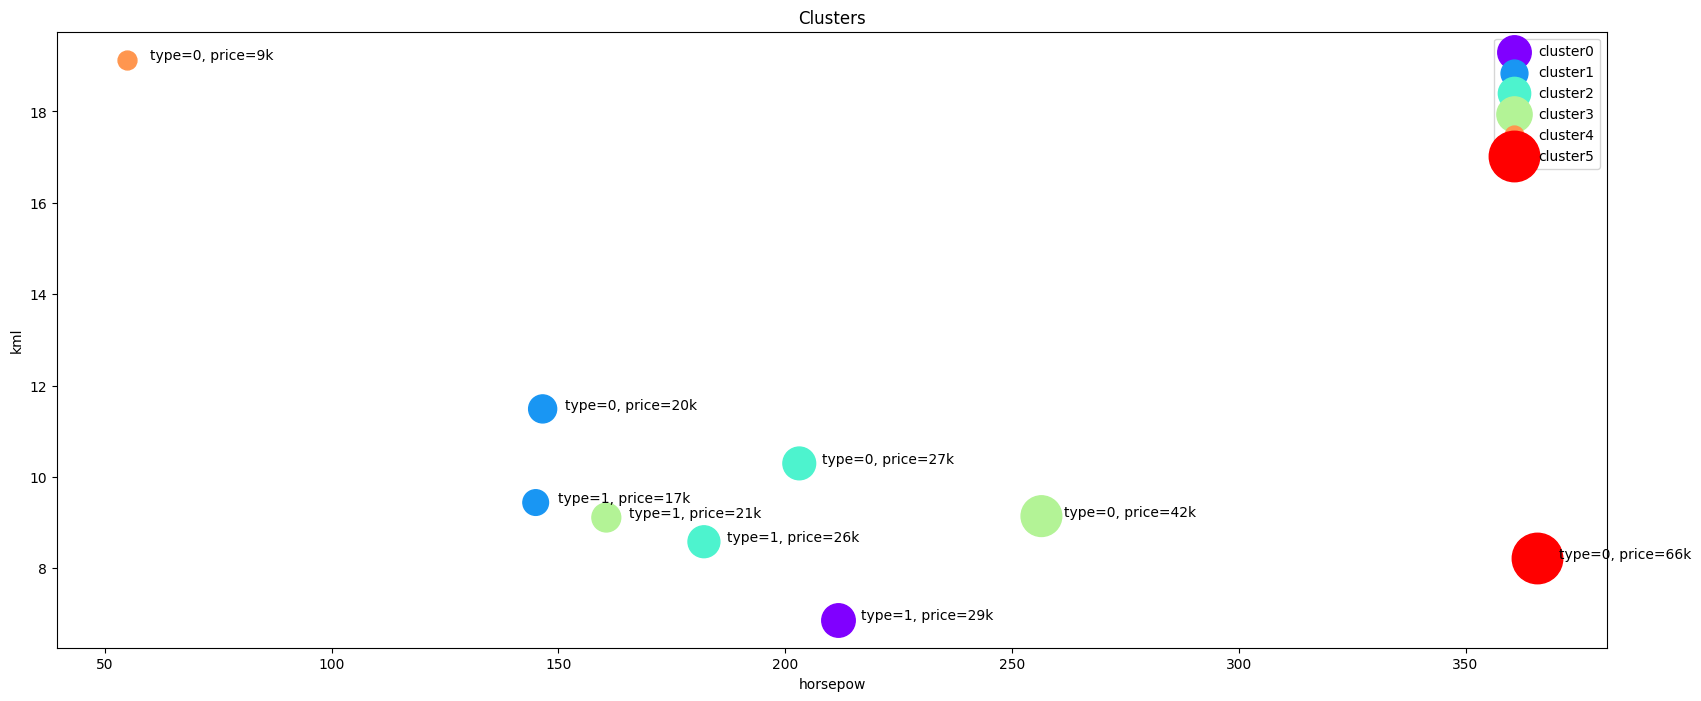

In [218]:
plt.figure(figsize=(20, 8))

for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.kml, s=subset.price*20, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('kml')